<h1>Unsupervised Learning and Dimensioinality Reduction</h1>

In [1]:
import sklearn.cluster as skCluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time


%matplotlib inline

<h2>Miscellaneous Functions Used</h2>
<p>Functions used throughout the program that do not necessarily belong to any one, particular section.</p>

<h4><i>Discrete Cumulative and Probability Density Function Maker</i></h4>
<p>This is not intuitive until you see the graphic example below.  You are counting the number of occurrences of a particular y-value of a function and putting it into a bin on the x-axis.  It is equivalent to transforming a function with the following if you consider values between xmin and xmax.</p><br>
   $$\text{pdf}\left( f(x) | x_{min}, x_{max} \right) = \left| f(x) \right|*(\int_{x_{min}}^{x_{max}}\left| f(x) \right|dx)^{-1}$$
<p>The cumulative distribution function is the following.</p>
   $$\text{cdf}\left( f(x)| x_{min}, x_{max} \right) = \int_{0}^{x}\text{pdf}\left( f(x)| x_{min}, x_{max} \right) dx$$

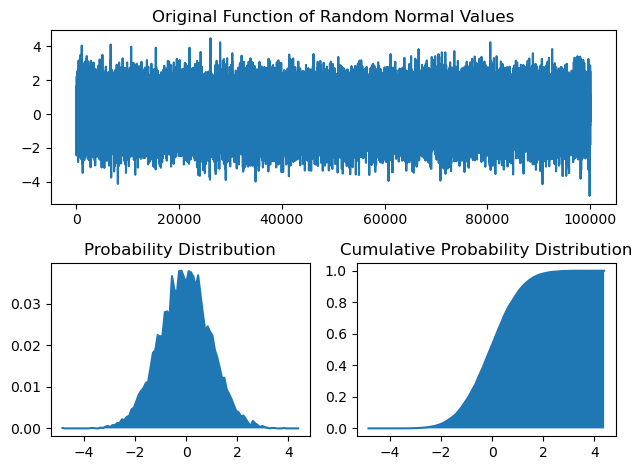

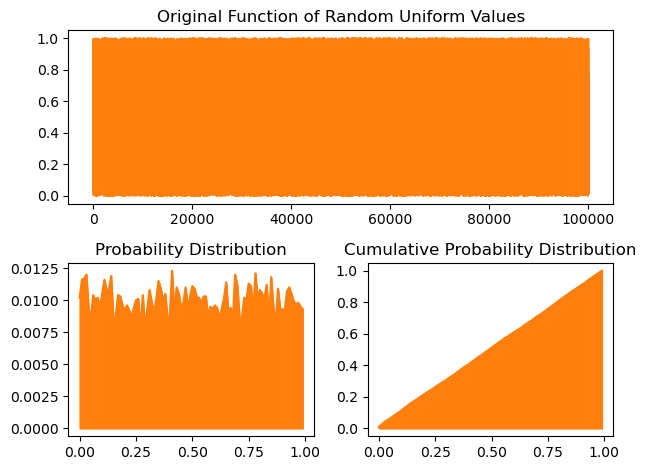

In [2]:
#Make almost any discrete function into a PDF of how many times a y-value occurs in frequency throughout the function
#nump is the one-dimensional array, resolution is the how many buckets/bins, and steps is how many to skip (keep at 1 if small dataset)
def makePDF(nump, resolution, steps): 
    normalizer0 = np.max(nump) - np.min(nump)
    size = np.size(nump)
    mean = np.mean(nump)
    minimum = np.min(nump)
    bucketVolume = normalizer0 / resolution
    buckets = np.zeros((resolution + 1, 2))
    
    #Set the bucket intervals
    buckets[0, 0] = np.min(nump)
    for i in range(1, resolution + 1):
        buckets[i] = [buckets[i - 1, 0] + bucketVolume, 0]
        
    #Add to the buckets
    for i in range(0, np.size(nump), steps):
        #Bucket interval to be stored in
        index = int((nump[i] - minimum) / bucketVolume)
        buckets[index, 1] += 1
           
    #Get rid of last value, as there's no information
    buckets = np.delete(buckets, resolution, 0)
    #Normalize the y-values
    normalizer1 = np.sum(buckets, axis = 0)[1]
    for i in range(0, resolution):
        buckets[i, 1] /= normalizer1
        
        
    return buckets



#Get the probability based on the pdf
def getProbPDF(x, pdf):
    for i in range(0, np.size(pdf, axis = 0) - 1):
        if (x >= pdf[i, 0] and x < pdf[i + 1, 0]):
            return pdf[i, 1]
    return 0
        
        
        
#CDF is very intuitive and simple with the PDF
def makeCDF(nump, resolution, steps):
    pdf = makePDF(nump, resolution, steps)
    
    cdf = np.zeros((resolution, 2))
    cdf[0, 0] = pdf[0, 0]
    cdf[0, 1] = pdf[0, 1]
    
    #Integrate the PDF
    for i in range(1, resolution):
        if (cdf[i - 1, 1] == 1):
            cdf[i, 0] = pdf[i, 0]
            cdf[i, 1] = 1
        else:
            cdf[i, 0] = pdf[i, 0]
            cdf[i, 1] += cdf[i - 1, 1] + pdf[i, 1]

            
    return cdf



#Get the probability based on the CDF
def getProbCDF(x, cdf):
    for i in range(0, np.size(cdf, axis = 0) - 1):
        if (x >= cdf[i, 0] and x < cdf[i + 1, 0]):
            return cdf[i, 1]
    return 0
    
    

def chooseRandomXFromPDF(pdf):
    randy = -np.inf
    while(randy == -np.inf):
        for i in range(0, np.size(pdf, axis = 0)):
            j = np.random.randint(0, np.size(pdf, axis = 0))
            randy = np.random.choice([-np.inf, pdf[j, 0]], p = [1 - pdf[j, 1], pdf[j, 1]])
            if (randy != -np.inf):
                return randy
    return 0
                                 
                                 
                                 
                                 

#Intuitive,  graphical example of the random normal values
np.random.seed(106)
array1 = np.random.normal(0, 1, 100000)
resolution = 100
steps = 10
func = makePDF(array1, resolution, steps)
xP = func[:, 0]
yP = func[:, 1]
func = makeCDF(array1, resolution, steps)
xC = func[:, 0]
yC = func[:, 1] 


#Plot them out
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 2, colspan = 4) 
plot2 = plt.subplot2grid((4, 4), (2, 0), rowspan = 2, colspan = 2) 
plot3 = plt.subplot2grid((4, 4), (2, 2), rowspan = 2, colspan = 2) 

plot1.plot(array1)
plot1.set_title('Original Function of Random Normal Values') 

plot2.plot(xP, yP)
plot2.fill_between(xP, yP)
plot2.set_title('Probability Distribution') 

plot3.plot(xC, yC)
plot3.fill_between(xC, yC)
plot3.set_title('Cumulative Probability Distribution')

plt.tight_layout() 
plt.show()



#Intuitive, graphical example of the random uniform values
np.random.seed(106)
array1 = np.random.uniform(0, 1, 100000)
resolution = 100
steps = 10
func = makePDF(array1, resolution, steps)
xP = func[:, 0]
yP = func[:, 1]
func = makeCDF(array1, resolution, steps)
xC = func[:, 0]
yC = func[:, 1] 


#Plot them out
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 2, colspan = 4) 
plot2 = plt.subplot2grid((4, 4), (2, 0), rowspan = 2, colspan = 2) 
plot3 = plt.subplot2grid((4, 4), (2, 2), rowspan = 2, colspan = 2) 

plot1.plot(array1, color='C1')
plot1.set_title('Original Function of Random Uniform Values') 

plot2.plot(xP, yP, color='C1')
plot2.fill_between(xP, yP, color='C1')
plot2.set_title('Probability Distribution') 

plot3.plot(xC, yC, color='C1')
plot3.fill_between(xC, yC, color='C1')
plot3.set_title('Cumulative Probability Distribution')

plt.tight_layout() 
plt.show()


<h4><i>Discrete Probability Density Function Subtractor and Uniform Distribution Deviation Measurer</i></h4>
<p>These are tools to address a few major problems with unsupervised learning; specifically Expectation Maximiaztion.</p>
<ul>
  <li>How do we know how many categories of unlabeled data to start with for the accuracy we want?</li>
  <li>How do we know where to initially place the center of a category?</li>
  <li>What are the distribution shapes of the unlabeled data categories?</li>
</ul>

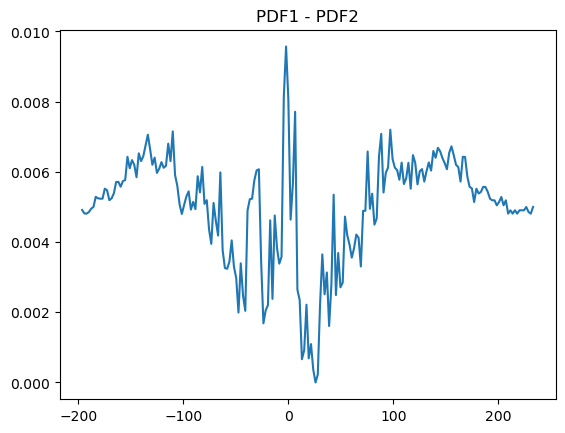

1.0


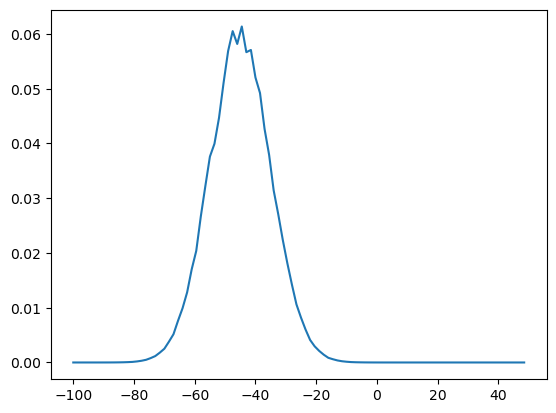

-44.5


In [3]:
#currPDF: PDF to subtract from and normalize
#assumedDistOfCluster: the assumed PDF of the cluster.  Will be normalized by assumedClusterDim.  Must be a PDF with same x-axis.  Makes this a highly specialized function
#assumedClusterSize: cluster integral size as a proportion to the currPDF.  0.5 is going to subtract half the area from the currPDF before normalization.  0 <= assumedClusterSize <= 1
def probDensitySubtractor(currPDF, assumedDistOfCluster, assumedClusterSize):
    #Subtract
    currPDF[:, 1] -= (assumedDistOfCluster[:, 1] * assumedClusterSize)
    #Normalize it for return  
    #Subtract to get correct y-axis placement
    currPDF -= np.min(currPDF[:, 1])
    #Divide by the integral ratios
    currPDF[:, 1] *= 1 / np.sum(currPDF[:, 1])
    return currPDF


#Returns a stochastic, normal PDF at a specified point on the axis given
#Noise 0.1 is 10% noise both ways from uniform distribution
def createNormAtSpecifiedPoint(minimumX, maximumX, point, deviation, noise, resolution):
    xAxis = np.arange(minimumX, maximumX, (maximumX - minimumX) / resolution)
    yAxis = np.zeros((resolution))
    for i in range(0, np.size(xAxis)):
        yAxis[i] = (1 / (deviation * (2 * np.pi) ** 0.5)) * np.exp(-0.5 * ((xAxis[i] - point) / deviation) ** 2) * np.random.uniform(low = 1 - noise, high = 1 + noise)
    retArray = np.c_[xAxis, yAxis]
    #Normalize it 
    retArray -= np.min(retArray[:, 1])
    retArray[:, 1] *= 1 / np.sum(retArray[:, 1])
    return retArray


def structuredF0(x):
    return ((x - 2 ** (x / 8)) * (10 * np.sin(x) + np.sin(10 * x) + np.sin(314.75 * x)))
array1 = makePDF(structuredF0(np.linspace(0, 50, 10000)), 200, 1)
xP1 = array1[:, 0]
yP1 = array1[:, 1]
array2 = makePDF(np.random.normal(0, 100, 10000), 200, 1)
xP2 = array2[:, 0]
yP2 = array2[:, 1]
array3 = probDensitySubtractor(array1, array2, 0.9)
xP3 = array3[:, 0]
yP3 = array3[:, 1]
plt.plot(xP3, yP3)
plt.title('PDF1 - PDF2')
plt.show()
print(np.sum(array3[:, 1]))

array4 = createNormAtSpecifiedPoint(-100, 50, -45, 10, 0.05, 100)
xP4 = array4[:, 0]
yP4 = array4[:, 1]
plt.plot(xP4, yP4)
plt.show()

print(chooseRandomXFromPDF(array4))

<h2>Create the Testing Dataset Classes</h2>
<p>Synthetic datasets allow us to get absolute metrics to judge our machine learning algorithms by.</p>

<h4><i>Create the Three-Dimesional, Discrete Testing Dataset Classes for Clustering and Dimensionality Reduction Analysis</i></h4>
<p></p>

In [4]:
#These are what you feed into the ClusterTestData
class Cluster:          
    
    def __init__(self, mean, deviation, clusterAngle, resolution, rSeed):
        np.random.seed(rSeed)
        #The center of the cluster [x, y, z]
        self.mean = np.asarray(mean)
        #Specify the deviation by axis [x, y, z]
        self.deviation = np.asarray(deviation)
        #An array of polar coordinates 
        #[[xz angle (0-2pi), y angle (0-2pi)], [xz angle, y angle]...]
        #These are applied after the cluster is created to rotate the cluster
        #Could be its own object if you were to add more information, but 2 columns is small enough to just be a list
        #Convert to numpy array
        self.clusterAngle = np.asarray(clusterAngle)
        #How many points there are
        self.resolution = resolution
        
        
        #Create the 3-D array of points normally distributed about the mean based on deviation
        points = np.zeros((resolution, 3))
        
        for i in range(0, resolution):
            x = np.random.normal(self.mean[0], self.deviation[0], 1)[0]
            y = np.random.normal(self.mean[1], self.deviation[1], 1)[0]
            z = np.random.normal(self.mean[2], self.deviation[2], 1)[0]
            points[i] = [x, y, z]
        
        self.points = points
        
        self.transform_points()
        
        
        
    #Transform all the points based on the angle
    def transform_points(self):
        xzAngle = self.clusterAngle[0]
        yAngle = self.clusterAngle[1] 
            
        #Apply spherical transformer to all the points
        for i in range(0, self.resolution):
            #Formulas based on http://www.labbookpages.co.uk/audio/beamforming/coordinates.html 3/25/2024
            #Distance and angle from mean
            currPoint = self.points[i]
            distanceX = currPoint[0] - self.mean[0]
            distanceY = currPoint[1] - self.mean[1]
            distanceZ = currPoint[2] - self.mean[2] 
            distance = np.sqrt(distanceX ** 2 + distanceY ** 2 + distanceZ ** 2)
            
            currVector = np.asarray([distanceX, distanceY, distanceZ])
            #currUnitVector = currVector / distance
            xzAngle1 = np.arctan2(currVector[2], currVector[0]) + xzAngle
            yAngle1 = np.arcsin(currVector[1] / distance) + yAngle 
            #Check if it's below or above the xz plane relative to the transformed cluster
            #if ((xyAngle2 > np.pi or xyAngle2 < -np.pi) or (yzAngle2 > np.pi or yzAngle2 < -np.pi)):
                #distance *= -1
                
            self.points[i] = np.asarray([np.cos(yAngle1) * np.cos(xzAngle1), np.sin(yAngle1), np.cos(yAngle1) * np.sin(xzAngle1)]) * distance + self.mean
    
    
    
    def get_number_of_points(self):
        return self.resolution
    
    
    #[[x1, y1, z1], [x2, y2, z2]...]
    def get_points(self):
        return np.asarray(self.points)
    
    
    
    def get_mean(self):
        return np.asarray(self.mean)
        

        
        
        
class ClusterTestDataset:
    
    def __init__(self, lowX, lengthX, lowY, lengthY, lowZ, lengthZ):
        #Lowest value of x
        self.lowX = lowX
        #The x-dimension length of the grid.  Starts at lowX.
        self.lengthX = lengthX
        #Lowest value of y
        self.lowY = lowY
        #The y-dimension length of the grid.  Starts at lowY.
        self.lengthY = lengthY
        #Lowest value of z
        self.lowZ = lowZ
        #The z-dimension length of the grid.  Starts at lowZ.
        self.lengthZ = lengthZ
        #An list of cluster objects with a limit of the colors size
        self.clusters = []
        #Colors RGB for the clusters
        self.colors = [[0.9, 0.1, 0.1], [0.1, 0.9, 0.1], [0.1, 0.1, 0.9], [0.92, 0.85, 0.05], [0.1, 0.75, 0.75], [0.3, 0.5, 0.6]]
        #Counts the number of clusters
        self.count = 0
        
        
    
    #Adds to the array of cluster objects
    def add_cluster(self, cluster):
        self.clusters.append(cluster)
        self.count += 1
    
    
    
    #This returns all the data needed to make an assessment of how accurate a clustering alorithm was: the point with their associated center
    #Returns [[x0, y0, z0, clusterCenter0], [x1, y1, z1, clusterCenter1]...]
    def return_data_for_clusters(self):
        #For every cluster, get its size to add to pointsSize
        #Quicker than appending or using lists and translatable
        pointsSize = 0
        for i in range(0, len(self.clusters)):
            pointsSize += self.clusters[i].get_number_of_points() 
        #Add all points and their associated center to a numpy array
        points = np.zeros((pointsSize, 4))
        #Define the centers [[center number1, centerX1, centerY1, centerZ1], [center number2, centerX2, centerY2, centerZ2]...]
        centers = np.zeros((self.count, 4))
        
        #Add every point to points with its associated center 
        #For every cluster
        k = int(0)
        for i in range(0, len(self.clusters)):
            centers[i] = np.concatenate((self.clusters[i].get_mean(), np.full(1, i, dtype = np.float32)))
            #Add its points
            vec = self.clusters[i].get_points()
            currMean = self.clusters[i].get_mean()
            for j in range(0, np.size(vec, axis = 0)):
                points[k] = np.concatenate((vec[j], np.full(1, i, dtype = np.float32)))
                k += 1
                
        return np.asarray(points), np.asarray(centers)
    
    
    
    #Returns every point as values not associated with any particular cluster.
    def return_all_points(self):
        values, dummy = self.return_data_for_clusters()
        return values[:, (0, 1, 2)]
    
    
    
    #Modified from https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py on 3/23/2024
    def draw_scatterplots(self):        
        #Create the empty plot
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        #Set the size
        fig.set_size_inches(10, 6, forward=True)
        #Set grid
        xLim = [self.lowX, self.lengthX + self.lowX]
        yLim = [self.lowY, self.lengthY + self.lowY]
        zLim = [self.lowZ, self.lengthZ + self.lowZ]
        ax.set(xlim = xLim, ylim = yLim, zlim = zLim)
        
        #Make a list for the 2D cluster np arrays
        clusters = []
        
        #For each cluster...
        for i in range(0, self.count):
            currCluster = self.clusters[i]
            currPoints = currCluster.get_points()
            clusters.append(currPoints)
            for j in range(0, currCluster.get_number_of_points()):
                #Matplotlib doesn't take care of outside values
                if (currPoints[j, 0] > xLim[0] and currPoints[j, 0] < xLim[1]):
                    xs = currPoints[j, 0]
                else:
                    continue
                if (currPoints[j, 1] > yLim[0] and currPoints[j, 1] < yLim[1]):
                    ys = currPoints[j, 1]
                else:
                    continue
                if (currPoints[j, 2] > zLim[0] and currPoints[j, 2] < zLim[1]):
                    zs = currPoints[j, 2]
                else:
                    continue
                ax.scatter(xs, ys, zs, color = self.colors[i], s = 10)
                    
        #Label 3D
        ax.set_title('3-D Scatterplot')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.zaxis.labelpad = -2.7 
        
        #Change the camera
        ax.view_init(30, -70, 0)
        
        plt.tight_layout() 
        plt.show()
        
               
        #Draw the 2D scatterplots    
        #Make each cluster a numpy array (quicker?)
        for i in range(0, len(clusters)):
            clusters[i] = np.asarray(clusters[i])
        
        #Make as a grid of 3 plots
        #xy
        plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 2, colspan = 2) 
        plot1.set_xlim([self.lowX, self.lowX + self.lengthX])
        plot1.set_ylim([self.lowY, self.lowY + self.lengthY])
        #xz
        plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan = 2, colspan = 2) 
        plot2.set_xlim([self.lowX, self.lowX + self.lengthX])
        plot2.set_ylim([self.lowZ, self.lowZ + self.lengthZ])
        #yz
        plot3 = plt.subplot2grid((4, 4), (2, 1), rowspan = 2, colspan = 2)
        plot3.set_xlim([self.lowY, self.lowY + self.lengthY])
        plot3.set_ylim([self.lowZ, self.lowZ + self.lengthZ])
        
        #For each cluster, get all the data points for the xy, xz, and yz planes
        #Store in list of [[cluster1's xy, cluster1's xz, cluster1's yz], [cluster2's xy, cluster2's xz, cluster2's yz]...]
        planes = [] 
        for i in range(0, len(clusters)): 
            cluster = clusters[i]
            #xy plane
            xy = cluster[:][:, (0, 1)],
            #xz plane
            xz = cluster[:][:, (0, 2)],
            #yz plane
            yz = cluster[:][:, (1, 2)]
            plot1.scatter(xy[0][:, 0], xy[0][:, 1], s = 10, color = self.colors[i])
            plot2.scatter(xz[0][:, 0], xz[0][:, 1], s = 10, color = self.colors[i])
            plot3.scatter(yz[:, 0], yz[:, 1], s = 10, color = self.colors[i])
            
        plot1.set_title('XY Plane')
        plot2.set_title('XZ Plane')
        plot3.set_title('YZ Plane')      
        
        plt.tight_layout() 
        plt.show()


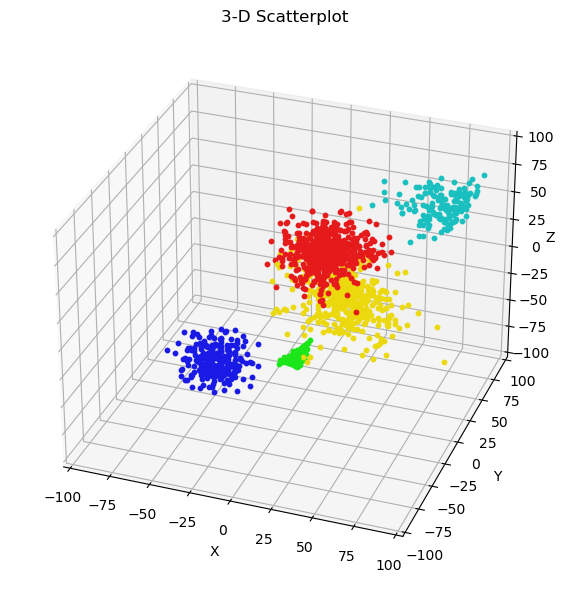

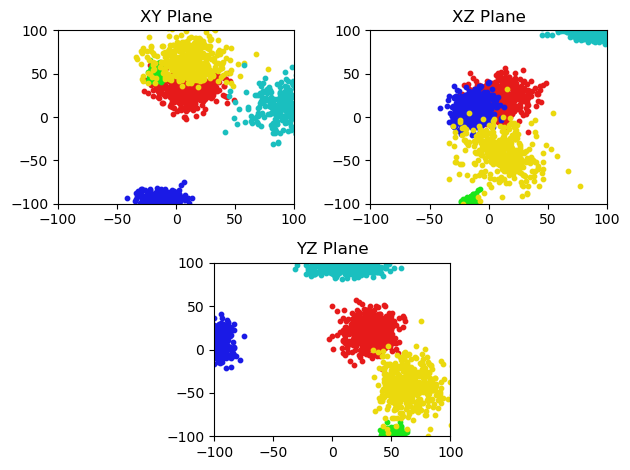

In [5]:
#Define everything randomly and consistently
np.random.seed(25)

#To return random mean between range
def randMean(low, high, rSeed):
    np.random.seed(20)
    np.random.seed(rSeed)
    return np.random.uniform(low, high, 3)

#To return random deviation between range
def randDev(length, rSeed):
    return np.random.uniform(0, length, 3)

#To return random angles
def randAngle(rSeed):
    return np.random.uniform(0, 2 * np.pi, 2)


#Create the Cluster objects
#LIMIT OF 6 because of colors.  Add more if you want more.
#Keep the rSeed values different for each
#def __init__(self, mean, deviation, clusterAngle, resolution, rSeed):
c1 = Cluster(randMean(-100, 100, 0), randDev(25, 0), randAngle(0), 600, 0)
c2 = Cluster(randMean(-100, 100, 1), randDev(25, 1), randAngle(1), 400, 1)
c3 = Cluster(randMean(-100, 100, 2), randDev(25, 2), randAngle(2), 700, 2)
c4 = Cluster(randMean(-100, 100, 3), randDev(25, 3), randAngle(3), 505, 3)
c5 = Cluster(randMean(-100, 100, 4), randDev(25, 4), randAngle(4), 300, 4)


#Define everything randomly and consistently
np.random.seed(20)


#Create the ClusterTestDataset object
#def __init__(self, lowX, lengthX, lowY, lengthY, lowZ, lengthZ, clusters):
dDS = ClusterTestDataset(-100, 200, -100, 200, -100, 200)
dDS.add_cluster(c1)
dDS.add_cluster(c2)
dDS.add_cluster(c3)
dDS.add_cluster(c4)
dDS.add_cluster(c5)


#Draw it all
dDS.draw_scatterplots()

<h4><i>Create the Four-Dimesional, Continuous Testing Dataset Class for Dimensionality Reduction Analysis</i></h4>
<p>This class is a "w", "x", "y", and "z" variable put through a function to receive an output dataset.  You may pick the starting value, value ranges, the resolution of the dataset, and the noise rate as well.    Below is the equation used.</p>
   $$z = cos(sin(w^{2}\ast \pi) + \frac{1}{1+e^{x}}+(w*y)+(w+x+y)^{2}*\pi)$$

In [6]:
class DimensionalityTestDataset:
        
    def __init__(self, lowW, lengthW, lowX, lengthX, lowY, lengthY, resolution, noise, noiseSeed):
        #Lowest value of w
        self.lowW = lowW
        #The w-dimension length of the dataset you would like returned.  Starts at loww.
        self.lengthW = lengthW
        #Lowest value of x
        self.lowX = lowX
        #The x-dimension length of the dataset you would like returned.  Starts at lowX.
        self.lengthX = lengthX
        #Lowest value of y
        self.lowY = lowY
        #The y-dimension length of the dataset you would like returned.  Starts at lowY.
        self.lengthY = lengthY
        #The resolution per oblong hyper-voxel.  Goes by powers of 10^resolution.
        #resolution > 0
        self.resolution = resolution
        #The general level of noise throughout the system that affects the ending "z" value
        #Normally distributed noise, but there may be a feature in the future to change the distribution shape.
        #Mean = 1
        #Standard deviation = noise * 1
        #z = equation * noise
        self.noise = noise
        #Maintains the same results per Dataset.  
        self.noiseSeed = noiseSeed


        plotSize = resolution ** 3
        #If your resulting plot is too big, the function returns.
        if (plotSize > 10000000):
            print("Array too big.")
            return 
        #Else it returns an empty plot of the correct size.  There are 4 columns for w, x, y, and z respectively.
        else:
            plot = np.zeros((plotSize, 4))
            #This may make things 4x quicker, because you're not accessing the whole plot each time.  Maybe.
            quicker = np.zeros((1, 4))

        #Keep the datasets the same.
        np.random.seed(noiseSeed)

        #Create the plot table
        wStep = lengthW / resolution
        xStep = lengthX / resolution
        yStep = lengthY / resolution
        for (w) in range(0, resolution):
            #Add noise to all the variables
            wE = lowW + wStep * w * np.random.normal(1, self.noise, 1)[0]
            for (x) in range(0, resolution):
                xE = lowX + xStep * x * np.random.normal(1, self.noise, 1)[0]
                for (y) in range(0, resolution):
                    yE = lowY + yStep * y * np.random.normal(1, self.noise, 1)[0]
                    z = self.continuous_function(wE, xE, yE)
                    quicker = [wE, xE, yE, z]
                    plot[w * resolution ** 2 + x * resolution + y] = quicker

        self.plot = plot
        
        
        
    #Change this to whatever you'd like.
    #It defines z.
    def continuous_function(self, w, x, y):
        return np.cos((np.sin((w ** 2) * np.pi) + (1 / (1 + np.exp(x))) + (w * y) + (w * x + y) ** 2)) 

        
    
    #Get the whole plot table
    def get_plot(self):
        return self.plot
    
    
    
    #Get a set of random data points specified by the return size
    #Repeated entries aren't a bad thing with noise
    def get_dataset(self, returnSize):
        dataset = np.zeros((returnSize, 4))
        for i in range(0, returnSize):
            dataset[i] = self.plot[np.random.randint(0, np.size(self.plot, 0))] * np.random.normal(1, self.noise, 1)[0]
            
        return dataset
    
    
    
    #THIS IS NOISELESS
    #Meant to show the true, original relationships between variables
    #This is brutal and atiquated to play with, so only touch the camera angle unless you want to do a lot of work
    #Most of this was trial and error, as there's very little documentation
    def draw_box_surface_plot(self):
        #Modified from https://matplotlib.org/stable/gallery/mplot3d/box3d.html#sphx-glr-gallery-mplot3d-box3d-py
        #This is likely outdated, but it still works as of 3/22/2024
        
        plotSize = self.resolution ** 3
        #If your resulting graph is too big, the function returns.
        if (plotSize > 10000000):
            print("Graph too big.")
            return 
        
        #Define dimensions
        resolution = self.resolution
        wStep, xStep, yStep = (self.lengthW + self.lengthW / resolution) / resolution, (self.lengthX + self.lengthX / resolution) / resolution, (self.lengthY + self.lengthY / resolution) / resolution
        w, x, y = np.meshgrid(np.arange(resolution) * wStep + self.lowW, np.arange(resolution) * xStep + self.lowX, np.arange(resolution) * yStep + self.lowY) 

        #Recreate data as mesh surfaces
        z = self.continuous_function(w, x, y)
        
        #Temperature guage
        kw = {
            'vmin': z.min(),
            'vmax': z.max(),
            'levels': np.linspace(z.min(), z.max(), self.resolution),
        }
        
        #Create a figure with 3D ax
        fig = plt.figure(figsize=(8, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        #Plot contour surfaces
        wxC = ax.contourf(
            #
            w[:, :, resolution - 1], x[:, :, resolution - 1], z[:, :, resolution - 1],
            zdir='z', offset = y.max(), **kw
        )
        wyC = ax.contourf(
            w[0, :, :], z[0, :, :], y[0, :, :],
            zdir='y', offset = self.lowX, **kw
        )
        xyC = ax.contourf(
            z[:, resolution - 1, :], x[:, resolution - 1, :], y[:, resolution - 1, :],
            zdir='x', offset = w.max(), **kw
        )
        
        # Set limits of the plot from coord limits
        wmin, wmax = w.min(), w.max()
        xmin, xmax = x.min(), x.max()
        ymin, ymax = y.min(), y.max()
        ax.set(xlim = [wmin, wmax], ylim = [xmin, xmax], zlim = [ymin, ymax])
        
        # Plot edges 
        edges_kw = dict(color='0.4', linewidth = 1.4, zorder=1e3)
        ax.plot([wmax, wmax], [xmin, xmax], [ymax, ymax], **edges_kw)
        ax.plot([wmin, wmax], [xmin, xmin], [ymax, ymax], **edges_kw)
        ax.plot([wmax, wmax], [xmin, xmin], [ymin, ymax], **edges_kw)
        
        # Set labels and zticks
        ax.set(
            xlabel = 'w',
            ylabel = 'x',
            zlabel = 'y',
            xticks = np.arange(self.lowW, self.lengthW + self.lowW + wStep, self.lengthW / 5),
            yticks = np.arange(self.lowX, self.lengthX + self.lowX + xStep, self.lengthX / 5),
            zticks = np.arange(self.lowY, self.lengthY + self.lowY + yStep, self.lengthY / 5),
        )
        
        # Set zoom and angle view
        #YOU CAN CHANGE THIS TOO
        ax.view_init(30, -70, 0)
        ax.set_box_aspect(None, zoom=0.8)
        
        # Colorbar
        fig.colorbar(xyC, ax=ax, fraction=0.02, pad=0.2, label='z')
        
        ax.set_title('3-D Box Surface Plot')
        
        # Show Figure
        plt.show()
        

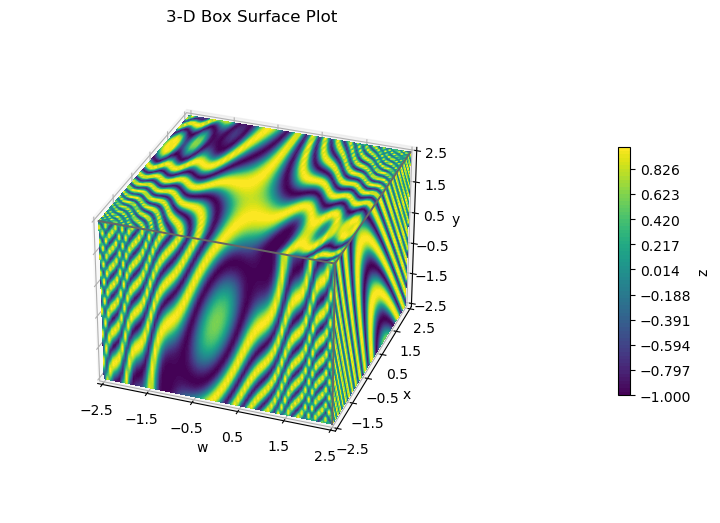

In [7]:
#GIVE IT TIME OR CHANGE THE RESOLUTION TO SOMETHING LOWER
#Show a 3D box surface plot of the data
#def __init__(self, lowW, lengthW, lowX, lengthX, lowY, lengthY, resolution, noise, noiseSeed):
mDD = DimensionalityTestDataset(-2.5, 5, -2.5, 5, -2.5, 5, 70, 0, 0)
mDD.draw_box_surface_plot()


<h2>Clustering Algorithms</h2>
<p>Cluster analysis groups data points together based on similarity metrics.</p>

<h4><i>Import and Analyze the Three-Dimensional Unlabeled Dataset</i></h4>

In [8]:
#Preliminary information
points = dDS.return_all_points()
np.info(points)


class:  ndarray
shape:  (2505, 3)
strides:  (8, 20040)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1c0ded0cc00
byteorder:  little
byteswap:  False
type: float64


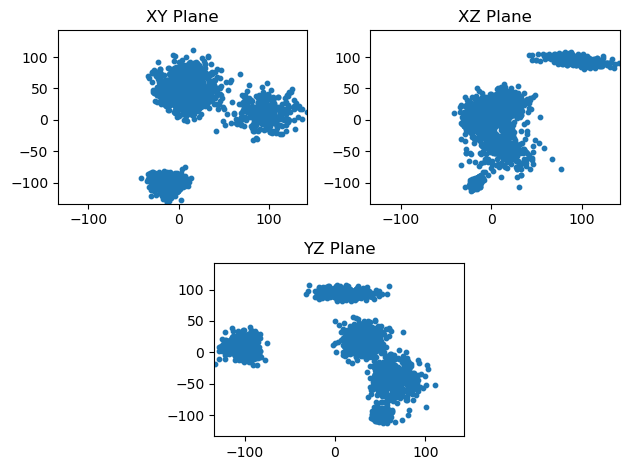

In [9]:
#Visualize the 3D data in Cartesian format, and make it square of the minimum data point to the maximum data point (x, y, or z)
#This preserves relative dimensions for the best visualization but can be changed depending on the data
#Labelings of planes are arbitrary and only show relationships
minimum = np.min(points) - 1
maximum = np.max(points) + 1
#xy
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 2, colspan = 2) 
plot1.set_xlim([minimum, maximum])
plot1.set_ylim([minimum, maximum])
plot1.scatter(points[:, 0], points[:, 1], s = 10)
plot1.set_title('XY Plane')
#xz
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan = 2, colspan = 2) 
plot2.set_xlim([minimum, maximum])
plot2.set_ylim([minimum, maximum])
plot2.scatter(points[:, 0], points[:, 2], s = 10)
plot2.set_title('XZ Plane')
#yz
plot3 = plt.subplot2grid((4, 4), (2, 1), rowspan = 2, colspan = 2)
plot3.set_xlim([minimum, maximum])
plot3.set_ylim([minimum, maximum])
plot3.scatter(points[:, 1], points[:, 2], s = 10)
plot3.set_title('YZ Plane')

plt.tight_layout() 
plt.show()


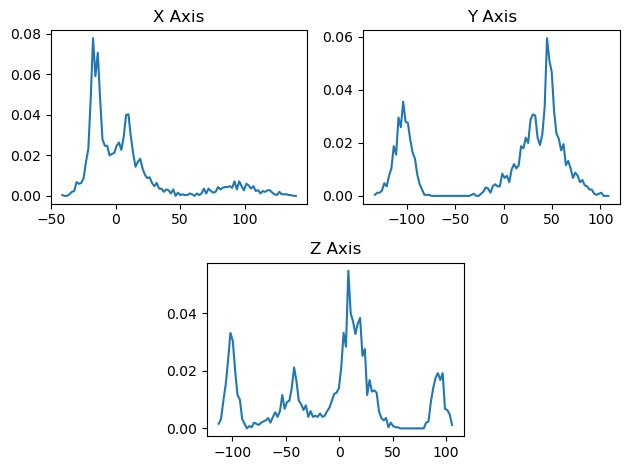

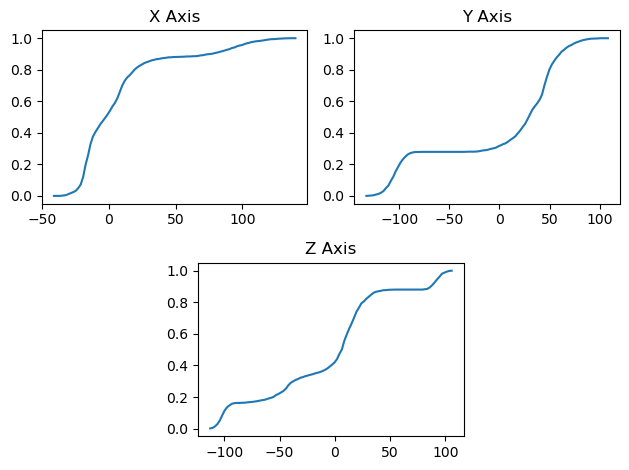

In [10]:
#Get the PDF functions for each axis

#x
pdfX = makePDF(points[:, 0], 100, 1)
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 2, colspan = 2) 
plot1.plot(pdfX[:, 0], pdfX[:, 1])
plot1.set_title('X Axis')
#y
pdfY = makePDF(points[:, 1], 100, 1)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan = 2, colspan = 2) 
plot2.plot(pdfY[:, 0], pdfY[:, 1])
plot2.set_title('Y Axis')
#z
pdfZ = makePDF(points[:, 2], 100, 1)
plot3 = plt.subplot2grid((4, 4), (2, 1), rowspan = 2, colspan = 2) 
plot3.plot(pdfZ[:, 0], pdfZ[:, 1])
plot3.set_title('Z Axis')

plt.tight_layout() 
plt.show()


#Get the CDF functions for each axis

#x
pdfX = makeCDF(points[:, 0], 100, 1)
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 2, colspan = 2) 
plot1.plot(pdfX[:, 0], pdfX[:, 1])
plot1.set_title('X Axis')
#y
pdfY = makeCDF(points[:, 1], 100, 1)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan = 2, colspan = 2) 
plot2.plot(pdfY[:, 0], pdfY[:, 1])
plot2.set_title('Y Axis')
#z
pdfZ = makeCDF(points[:, 2], 100, 1)
plot3 = plt.subplot2grid((4, 4), (2, 1), rowspan = 2, colspan = 2) 
plot3.plot(pdfZ[:, 0], pdfZ[:, 1])
plot3.set_title('Z Axis')

plt.tight_layout() 
plt.show()

<h4><i>Traditional K-Means Clustering with Bayesian Assumptions</i></h4>

In [134]:
#Performs a k-means clustering algorithm on a 2D dataset
#points is the dataset
#k is either a set of numpy array coordinates [[x1, y1], [x2, y2]...] or a specified number of clusters.  It defaults to 8 assumed clusters just like sklearn's.
#devMetric measures how much the cluster changed since the last iteration
#Resolution is the resolution of the PDFs 
def kMeans2D(points, devMetric = 0.001, k = 8, resolution = 500):
    #If it's not a set of coordinates, create the specified number of clusters in random areas given by the normalized PDFs of x and y 
    if not isinstance(k, np.ndarray):
        #Get distribution info
        xPoints = points[:, 0]
        yPoints = points[:, 1]
        xMin, xMax, xDev, xMean = np.min(xPoints), np.max(xPoints), np.std(xPoints), np.mean(xPoints)
        yMin, yMax, yDev, yMean = np.min(yPoints), np.max(yPoints), np.std(yPoints), np.mean(yPoints)
        #Get the PDF for each axis
        xPDF = makePDF(xPoints, resolution, 1)
        yPDF = makePDF(yPoints, resolution, 1)
        #For each cluster center, assume that they are all equally sized and normal.
        #Subtract k times and hope that the end PDF is flat (ideal)
        #Deviation of is based on expectedDevBetweenClusters
        #This selection process is stochastic
        clusters = np.zeros((k, 2))
        for i in range(0, k):
            xClusterCenter = chooseRandomXFromPDF(xPDF)
            clusterPDF = createNormAtSpecifiedPoint(xMin, xMax, xClusterCenter, (xMax - xMin) / k, 0.01, resolution)
            xPDF = probDensitySubtractor(xPDF, clusterPDF, 1 / k)
            clusters[i, 0] = xClusterCenter
            #clusters[i, 0] = xClusterCenter   
        #For each xClusterCenter, find its associated y-value by using the same method with xClusterCenter already being decided
        for i in range(0, k):
            yClusterCenter = yPDF[np.searchsorted(yPDF[:, 0], clusters[i, 0]), 0]
            clusterPDF = createNormAtSpecifiedPoint(yMin, yMax, yClusterCenter, (yMax - yMin) / k, 0.01, resolution)
            yPDF = probDensitySubtractor(yPDF, clusterPDF, 1 / k)
            clusters[i, 1] = yClusterCenter   
    else:
        clusters = k
        
    print(clusters)
    
    
    #Gets the main loop going.
    devCurr = 1
    
    #Main while loop
    while(devCurr > devMetric):    
        #RESET STEP
        devCurr = 0
        
        #ASSIGN CLUSTER STEP
        #Calculate the points's index for every cluster.
        for i in range(0, pointsSize):
            return
                
        #CALCULATE CENTROID STEP
        #Find the mean X and Y for each cluster
        for i in range(0, clustersSize):
            return
            
            
    return clusters[:, (0, 1)], points


In [135]:
#My k-means algorithm
startTime = time.time()
kMeansClusterMeans2D, kMeansClusters2D = kMeans2D(points[:, (0, 1)], devMetric = 0.00001, k = 5)
endTime1 = time.time() - startTime
plt.scatter(kMeansClusters2D[:, 0], kMeansClusters2D[:, 1], s = 50, c = kMeansClusters2D[:, 2])
plt.scatter(kMeansClusterMeans2D[:, 0], kMeansClusterMeans2D[:, 1], s = 200, marker = '*', c = np.full(np.size(kMeansClusterMeans2D[:, 0]), "black"))
plt.title('kMeans2D()')

plt.show()


#sklearn's k-means algorithm
startTime = time.time()
sklearnMeans = (skCluster.KMeans(n_clusters = 5, random_state = 0, n_init = "auto").fit(points[:, (0, 1)])).cluster_centers_
endTime2 = time.time() - startTime
sklearnClusters = np.c_[points[:, (0, 1)], skCluster.KMeans(n_clusters = 5, random_state = 0, n_init = "auto").fit_predict(points[:, (0, 1)])]
plt.scatter(sklearnClusters[:, 0], sklearnClusters[:, 1], s = 50, c = sklearnClusters[:, 2])
plt.scatter(sklearnMeans[:, 0], sklearnMeans[:, 1], s = 200, marker = '*', c = np.full(np.size(sklearnMeans[:, 0]), "black"))
plt.title('skCluster.KMeans()')

plt.show()


#Original
originalPoints, originalCentroids = dDS.return_data_for_clusters()
plt.scatter(originalPoints[:, 0], originalPoints[:, 1], s = 50, c = originalPoints[:, 3])
plt.scatter(originalCentroids[:, 0], originalCentroids[:, 1], s = 200, marker = '*', c = np.full(np.size(originalCentroids[:, 3]), "black"))
plt.title('Original')

plt.show()



#Show information about deviation from the original
#The deviation metric being used to compare is the mean of all original cluster means.  It is a decent metric, but it can run into issues.
#It is the distance from the means.
#An average can come from any combination of numbers, so this is not absolute.  You should verify visually or by some other method.
#UPDATE: there's a better method
#df = pd.DataFrame([[np.sqrt((np.mean(kMeansClusterMeans2D[:, 0]) - np.mean(originalCentroids[:, 0])) ** 2 + (np.mean(kMeansClusterMeans2D[:, 1]) - np.mean(originalCentroids[:, 1])) ** 2), str(endTime1)], 
                   #[np.sqrt((np.mean(originalPoints[:, 0]) - np.mean(originalCentroids[:, 0])) ** 2 + (np.mean(originalPoints[:, 1]) - np.mean(originalCentroids[:, 1])) ** 2), str(endTime2)], 
                   #[0, "N/A"]], 
                  #columns = ['Deviation from Original', 'Processing Time'], 
                  #index = ['Mine', 'Sci-Kit Learn', 'Original'])
                
#A better method is comparing the distributions of all cluster means along each axis using t-distributions
xDiffMine = stats.ttest_ind(originalCentroids[:, 0], kMeansClusterMeans2D[:, 0])
yDiffMine = stats.ttest_ind(originalCentroids[:, 1], kMeansClusterMeans2D[:, 1])
xDiffSK = stats.ttest_ind(originalCentroids[:, 0], sklearnMeans[:, 0])
yDiffSK = stats.ttest_ind(originalCentroids[:, 1], sklearnMeans[:, 1])
xDiffOrig = stats.ttest_ind(originalCentroids[:, 0], originalCentroids[:, 0])
yDiffOrig = stats.ttest_ind(originalCentroids[:, 1], originalCentroids[:, 1])

df = pd.DataFrame([[xDiffMine[1], yDiffMine[1], endTime1], 
                   [xDiffSK[1], yDiffSK[1], endTime2], 
                   [xDiffOrig[1], yDiffOrig[1], "N/A"]], 
                  columns = ['x-axis p-value', 'y-axis p-value', 'Processing Time'], 
                  index = ['Mine', 'Sci-Kit Learn', 'Original'])

df.style


[[ 10.60952822  10.82915039]
 [  3.65784708   4.01426725]
 [  7.68361448   7.90978775]
 [  9.14800428   9.37112463]
 [-23.05197116 -22.75927107]]


NameError: name 'pointsSize' is not defined

<h4><i>Simple Expectation Maximization Clustering Analysis</i></h4>

In [13]:
#Performs a expectation maximization clustering algorithm on a 3D dataset
#points is the dataset
#k is either a set of numpy array coordinates [[x1, y1, z1], [x2, y2, z2]...] or a specified number of clusters.  It defaults to 1 assumed cluster just like sklearn's.
#devMetric measures how much the clusters changed since the last iteration
#gaussDeviation is the x, y, and z deviation starting size and is defined by the axis's mins and maxxes.  Higher values means greater deviation.
def expectationMaximization3D(points, devMetric = 0.001, k = None, gaussDeviation = [1, 1, 1]):
    xMin, yMin, zMin = np.min(points[:, 0]), np.min(points[:, 1]), np.min(points[:, 2])
    xMax, yMax, zMax = np.max(points[:, 0]), np.max(points[:, 1]), np.max(points[:, 2])
    #If it's not a set of coordinates, create the specified number of clusters in random areas given by the x, y, and z's mins and maxes
    if not isinstance(k, np.ndarray):
        clusters = np.zeros((k, 3))
        for i in range(0, k):
            x = np.random.uniform(xMin, xMax)
            y = np.random.uniform(yMin, yMax)
            z = np.random.uniform(zMin, zMax)
            clusters[i] = [x, y, z]
    else:
        clusters = k
    
    #How many distributions
    distSize = np.size(clusters)
    
    #Size of deviation for each axis is relative to the mean of all the axis' points 
    
    
    #Create the distributions along the x, y, and z axis.
    #Form of xDistributions = [[x distribution 1's x-axis mean, x distribution 1's x-axis deviation, distribution 1's identifier], [x distribution 2's x-axis mean, x distribution 2's x-axis deviation, distribution 2's identifier]...]
    #Form of yDistributions = [[y distribution 1's y-axis mean, y distribution 1's y-axis deviation, distribution 1's identifier], [y distribution 2's y-axis mean, y distribution 2's y-axis deviation, distribution 2's identifier]...]
    #Form of zDistributions = [[z distribution 1's z-axis mean, z distribution 1's z-axis deviation, distribution 1's identifier], [z distribution 2's z-axis mean, z distribution 2's z-axis deviation, distribution 2's identifier]...]
    #Form of distributions = [xDistributions, yDistributions, zDistributions]
    #Initialize distributions array
    distributions = np.zeros((3, distSize, 3))
    #For each cluster, make its starting distributions
    for i in range(0, np.size(clusters)):
        #Define its x-axis, y-axis, and z-axis distributions where j is its distribution identifier
        for j in range(0, np.size(clusters)):
    
    
    #Gets the main loop going.
    devCurr = 1
    
    #Main while loop
    while(devCurr > devMetric):    
        #RESET STEP
        devCurr = 0
        
        #ASSIGN CLUSTER STEP
        #Calculate the points's index for every cluster.
        for i in range(0, pointsSize):
            #Find the minimum current distance and assign the point to the cluster.
            #currDistance is a default infinity and resets every time
            currDistance = np.full(clustersSize, np.inf)
            for j in range(0, clustersSize):
                #As long as the cluster doesn't have too many hits.
                if (clusters[j, 2] > 0):
                    currDistance[j] = np.sqrt((clusters[j, 0] - points[i, 0]) ** 2 + (clusters[j, 1] - points[i, 1]) ** 2)
            minIndex = np.argmin(currDistance)
            points[i, 2] = minIndex
            clusters[minIndex, 2] -= 1
                
        #CALCULATE CENTROID STEP
        #Find the mean X and Y for each cluster
        for i in range(0, clustersSize):
            currPointsIndex = np.where(points[:, 2] == i)
            currPoints = points[currPointsIndex]
            meanX = np.mean(currPoints[:, 0])
            meanY = np.mean(currPoints[:, 1])
            lastCluster = clusters[i, (0, 1)]        
            clusters[i, (0, 1)] = [meanX, meanY]
            #Add to the distance deviation
            devCurr += np.sqrt((lastCluster[0] - clusters[i, 0]) ** 2 + (lastCluster[1] - clusters[i, 1]) ** 2)
            
        #GET AVERAGE DEVIATION STEP
        devCurr /= clustersSize
            
            
    return clusters[:, (0, 1)], points


IndentationError: expected an indented block after 'for' statement on line 36 (4222946310.py, line 40)

In [ ]:
print(np.zeros((3, 5, 3)))